In [4]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [5]:
sw = xr.open_dataset("/scratch/dklein3/soilw.mon.mean.v2.nc")
sw

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 884)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-08-01
Data variables:
    soilw    (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          CPC Soil Moisture
    institution:    NOAA/ESRL PSD
    dataset_title:  CPC Soil Moisture
    history:        Wed Oct 18 15:13:37 2017: ncks -d time,,-2 soilw.mon.mean...
    NCO:            4.6.9
    References:     https://www.psl.noaa.gov/data/gridded/data.cpcsoil.html

In [6]:
sw_mean=sw.mean(dim='time')
#This calculates the mean soil moisture level over the time period of the dataset

Text(0.5, 1.0, 'CPC Soil Moisture 1948-2021')

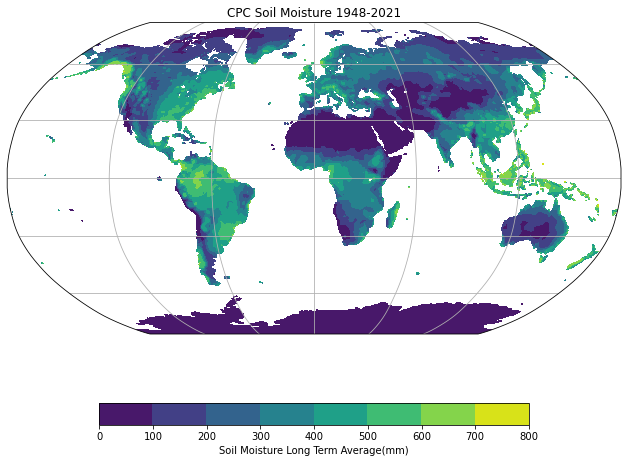

In [17]:
#Set the figure size
fig = plt.figure(figsize=(11,8.5))

#Set the axes and map projection
ax=plt.axes(projection=ccrs.Robinson())

#Add cyclic point to data
data=sw_mean['soilw']
data, lons = add_cyclic_point(data, coord=sw['lon'])

#Make a filled contour plot
cs=ax.contourf(lons, sw['lat'], data, transform = ccrs.PlateCarree())

#Add gridlines
ax.gridlines()

#Set color bar and title
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Soil Moisture Long Term Average(mm)')
plt.title('CPC Soil Moisture 1948-2021')